In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Perceptron Using Framework

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)

In [10]:
X.shape

(100, 2)

## Plot the dataset

Text(0, 0.5, 'Resume Score')

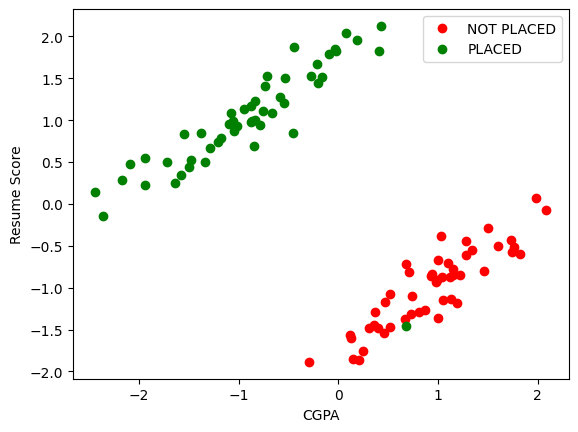

In [11]:
plt.plot(X[y==0][:,0], X[y==0][:,1], "o", label="NOT PLACED", color="red")
plt.plot(X[y==1][:,0], X[y==1][:,1], "o", label="PLACED", color="green")
plt.legend()
plt.xlabel("CGPA")
plt.ylabel("Resume Score")

## Train Perceptron

In [14]:
from sklearn.linear_model import Perceptron

In [15]:
p = Perceptron()
p.fit(X, y)

Perceptron()

## Plot Decision Boundary

In [20]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

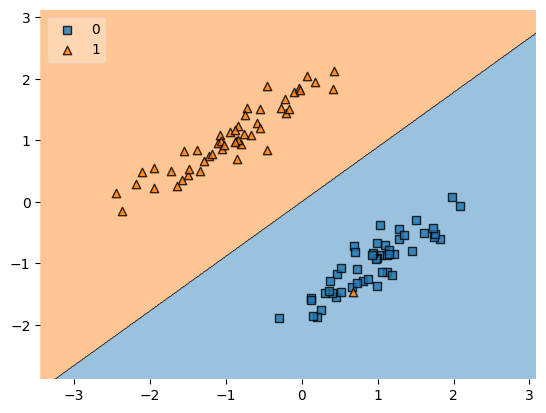

In [21]:
plot_decision_regions(X, y, clf=p, legend=2)

# Perceptron Trick

In [22]:
def step(x):
  return 1 if x >= 0 else 0

In [23]:
def plot_perceptron_learning(X, y, weights):
    plt.plot(X[y==0][:,1], X[y==0][:,2], "o", label="NOT PLACED", color="red")
    plt.plot(X[y==1][:,1], X[y==1][:,2], "o", label="PLACED", color="green")

    # Generate points for decision boundary
    m = -weights[1] / weights[2]
    c = -weights[0] / weights[2]
    y = m * X[:,1] + c
    x_values = np.linspace(X[:,0].min(), X[:,0].max(), 100)

    # Plot decision boundary
    plt.plot(x_values, y, label="Decision Boundary")

    plt.legend()
    plt.xlabel("CGPA")
    plt.ylabel("Resume Score")
    plt.show()

In [39]:
def train_perceptron(X, y, epochs=1000, lr=1):
  X = np.insert(X, 0, 1, axis=1) # Add column  for dummy 1s (for bias multiplication)
  weights = np.zeros(X.shape[1])  # Initialize weights randomly

  for i in range(epochs):
    j = np.random.randint(0, X.shape[0]) # Randomly select a row
    z = np.dot(X[j], weights)
    y_pred = step(z)
    weights = weights + lr * (y[j] - y_pred) * X[j]

  plot_perceptron_learning(X, y, weights)
  intercept_, coef_ = weights[0], weights[1:]
  return intercept_, coef_

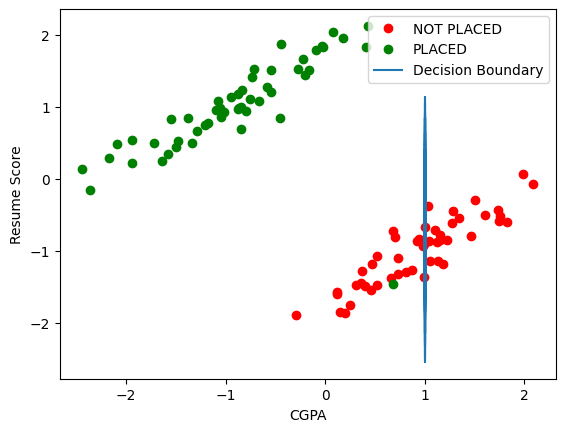

Perceptron trained successfully
intercept x0: 1.0
coef w1, w2: [-1.44538095  1.78131753]


In [40]:
intercept_, coef_ = train_perceptron(X, y)
print("Perceptron trained successfully")
print(f"intercept x0: {intercept_}")
print(f"coef w1, w2: {coef_}")